In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [45]:
from google.colab import drive

In [46]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
data=pd.read_csv('/content/drive/MyDrive/ML Practice/liver_cirrhosis.csv')

In [48]:
data.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [50]:
data.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

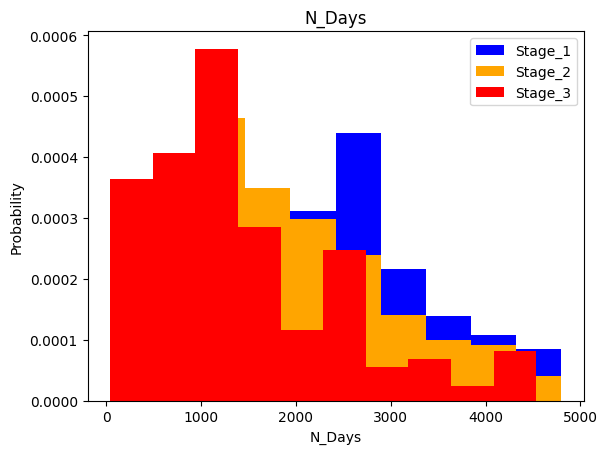

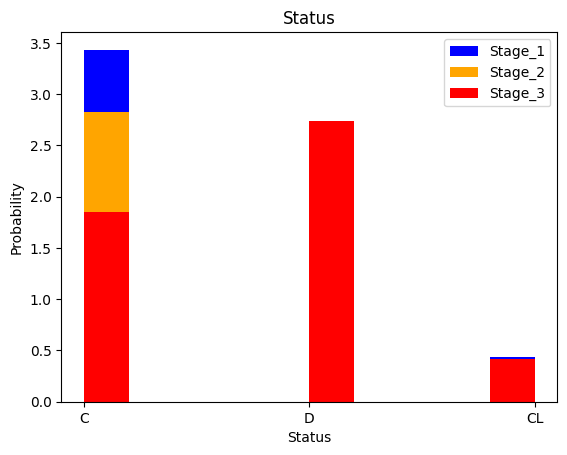

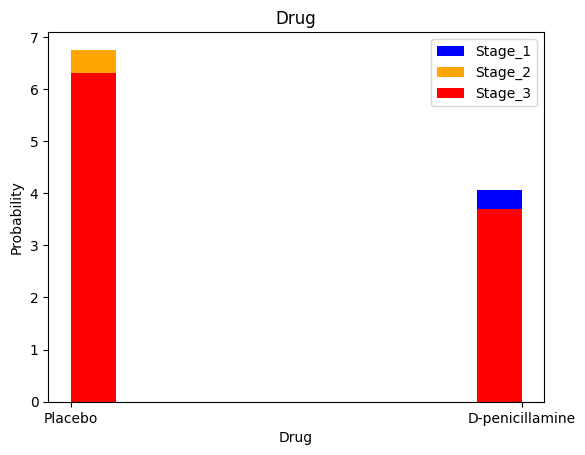

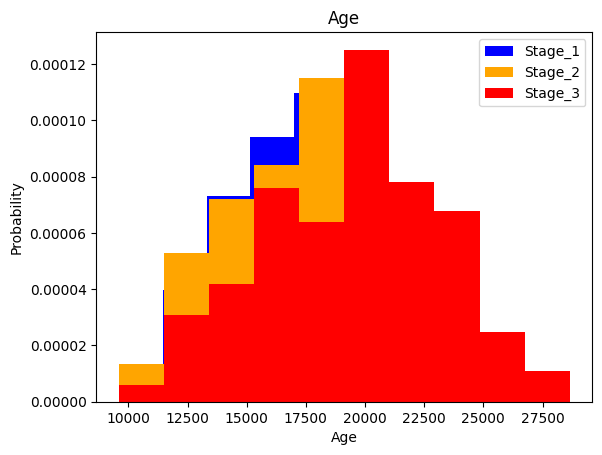

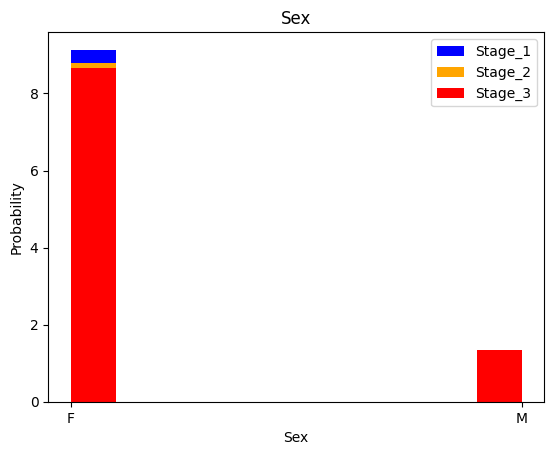

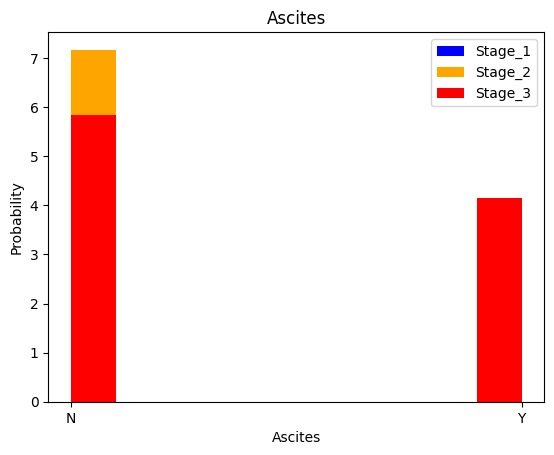

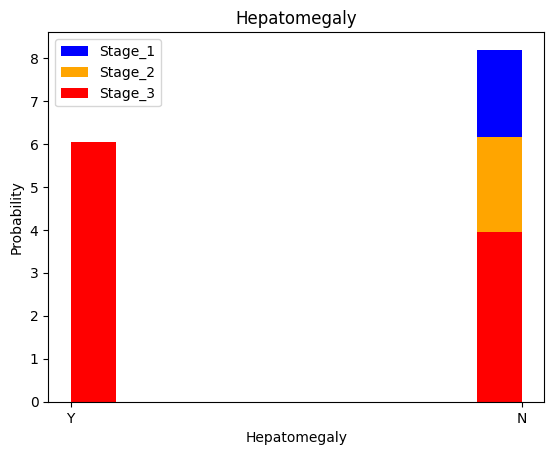

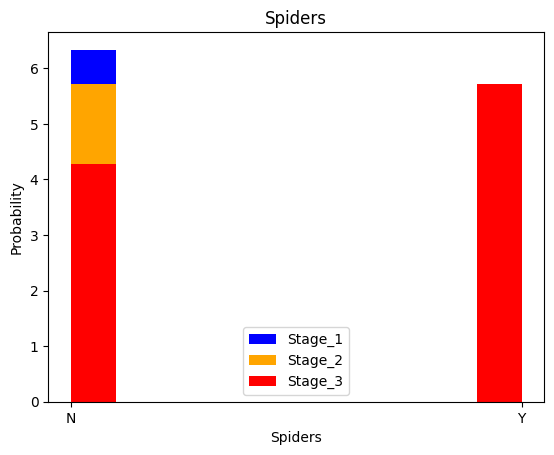

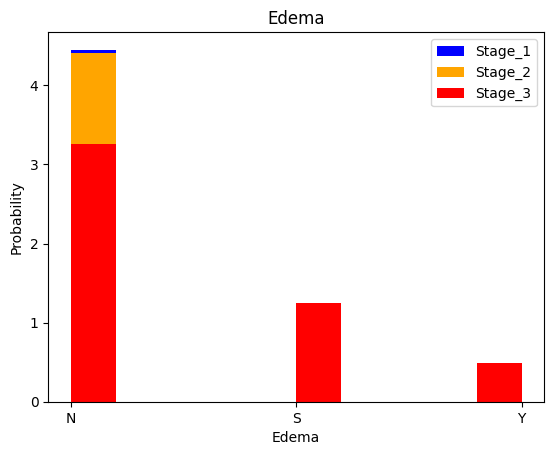

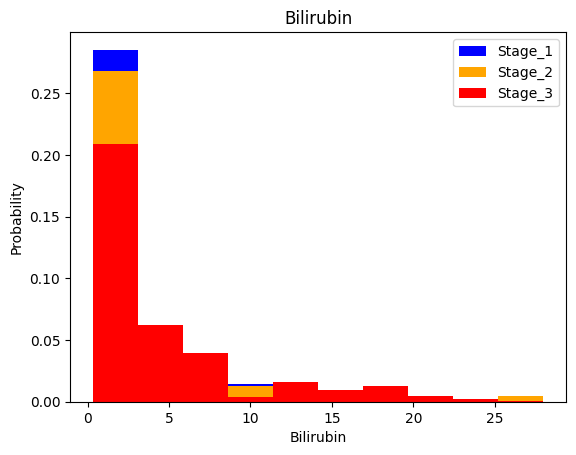

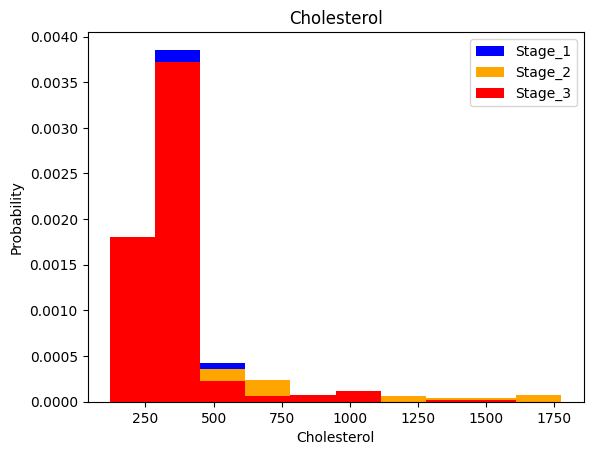

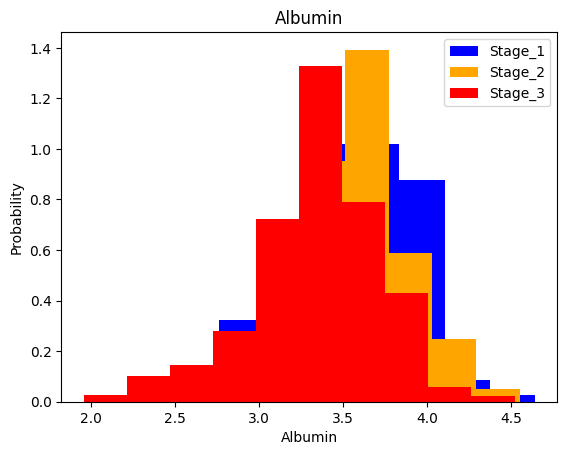

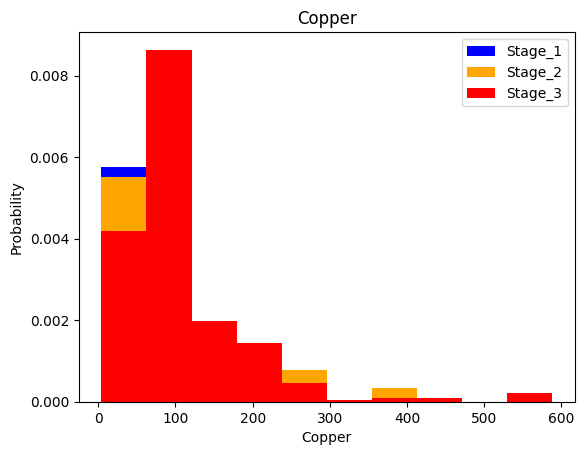

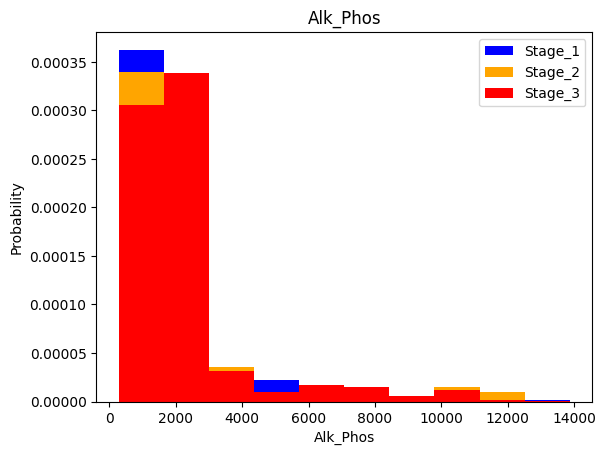

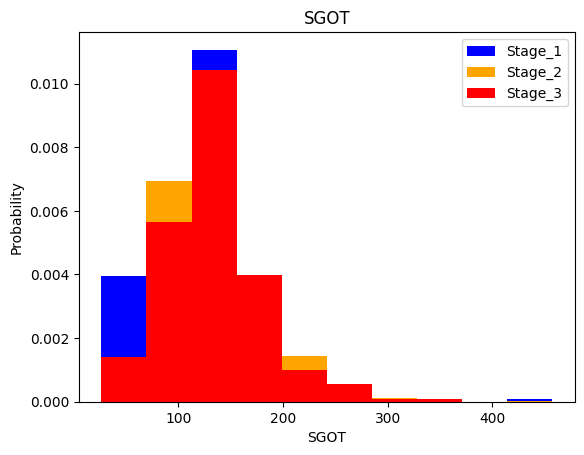

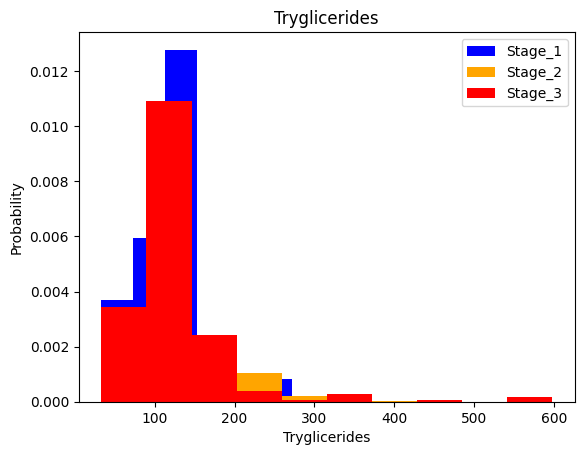

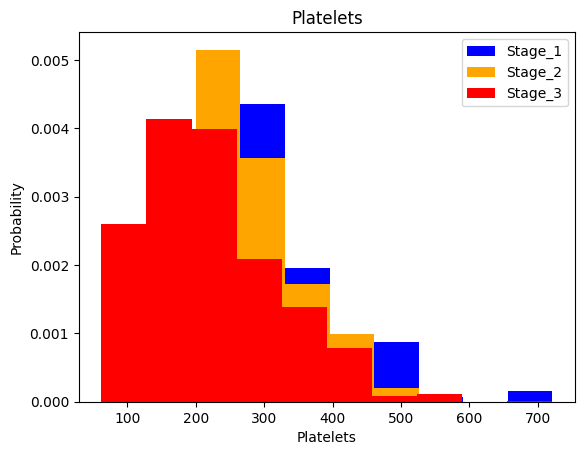

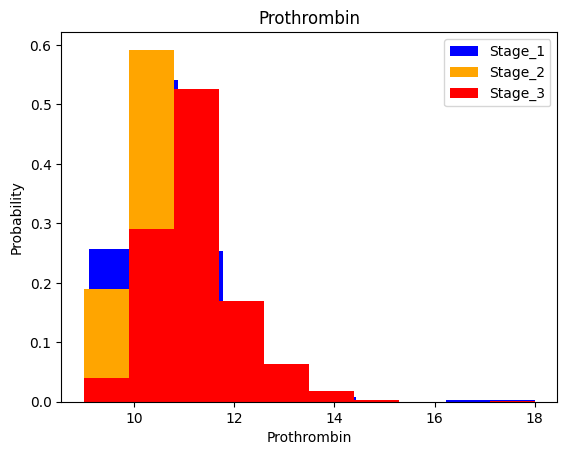

In [51]:
for labels in data.columns[:-1]:
  plt.hist(data[data['Stage']==1][labels],color='blue',label='Stage_1',density=True)
  plt.hist(data[data['Stage']==2][labels],color='orange',label='Stage_2',density=True)
  plt.hist(data[data['Stage']==3][labels],color='red',label='Stage_3',density=True)
  plt.title(labels)
  plt.xlabel(labels)
  plt.ylabel('Probability')
  plt.legend()
  plt.show()

In [52]:
data.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000
mean,1887.117040,18495.877080,3.402644,372.331471,3.486578,100.184663,1995.675597,123.166345,123.822548,256.007337,10.734549,2.00116
std,1091.690918,3737.596616,4.707491,193.668452,0.380488,73.184840,1798.885660,47.747616,52.786350,98.679006,0.904436,0.81387
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.00000
25%,1080.000000,15694.000000,0.800000,275.000000,3.290000,52.000000,1032.000000,92.000000,92.000000,189.000000,10.000000,1.00000
50%,1680.000000,18499.000000,1.300000,369.510563,3.510000,97.648387,1828.000000,122.556346,124.702128,251.000000,10.600000,2.00000
75%,2576.000000,20955.000000,3.400000,369.510563,3.750000,107.000000,1982.655769,134.850000,127.000000,311.000000,11.100000,3.00000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,3.00000


In [53]:
data.isna().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [54]:
data.nunique()

N_Days           549
Status             3
Drug               2
Age              510
Sex                2
Ascites            2
Hepatomegaly       2
Spiders            2
Edema              3
Bilirubin        113
Cholesterol      220
Albumin          179
Copper           197
Alk_Phos         336
SGOT             240
Tryglicerides    157
Platelets        295
Prothrombin       51
Stage              3
dtype: int64

In [55]:
data.shape

(25000, 19)

In [56]:
data.dtypes

N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage              int64
dtype: object

In [57]:
duplicate_rows = data[data.duplicated()]
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
       N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
51       2224      C          Placebo  17874   F       N            Y       N   
69       2224      C          Placebo  17874   F       N            Y       N   
107       681      D          Placebo  11462   F       N            N       N   
149       617     CL          Placebo  15341   F       Y            N       Y   
154      1170      C          Placebo  16658   F       N            Y       Y   
...       ...    ...              ...    ...  ..     ...          ...     ...   
24995    3584      D  D-penicillamine  23612   F       N            N       N   
24996    3584      D  D-penicillamine  23612   F       N            N       N   
24997     971      D  D-penicillamine  16736   F       N            Y       Y   
24998    3707      C  D-penicillamine  16990   F       N            Y       N   
24999    3707      C  D-penicillamine  16990   F       N            Y       N   

      Edema

In [58]:
data_no_duplicates = data.drop_duplicates()
data_new=data_no_duplicates

In [59]:
data_new.shape

(9639, 19)

<ipython-input-60-6cacc6316595>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['Stage'] = data_new['Stage'].astype('object')


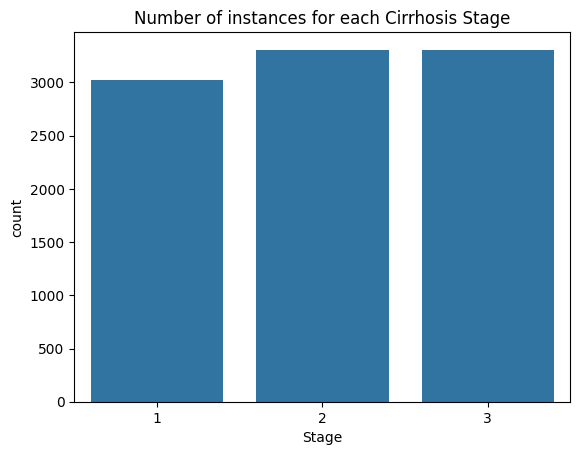

In [60]:
data_new['Stage'] = data_new['Stage'].astype('object')
sns.countplot(data = data_new, x = 'Stage')
plt.title('Number of instances for each Cirrhosis Stage')
plt.show()

In [61]:
categorical_columns = data_new.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_columns)

Categorical columns: ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']


In [62]:
numerical_columns = data_new.select_dtypes(include=['number']).columns.tolist()
print("Numerical columns:", numerical_columns)

Numerical columns: ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']


In [63]:
data_new['Age']=data_new['Age']/365
data_new['Age']=data_new['Age'].round()
min_age = data_new['Age'].min()
max_age = data_new['Age'].max()
print(f'The range of the Age variable is from {min_age} to {max_age}.')

The range of the Age variable is from 26.0 to 78.0.


<ipython-input-63-13dacc892f55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['Age']=data_new['Age']/365
<ipython-input-63-13dacc892f55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['Age']=data_new['Age'].round()


In [64]:
bins=[25,35,45,80]
labels=['Young','Adult','Senior']
data_new['Age_group']=pd.cut(data_new['Age'],bins=bins,labels=labels)
print(data_new[['Age','Age_group']].head())

    Age Age_group
0  51.0    Senior
1  54.0    Senior
2  32.0     Young
3  45.0     Adult
4  59.0    Senior


<ipython-input-64-c8deea1e45ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['Age_group']=pd.cut(data_new['Age'],bins=bins,labels=labels)


In [65]:
X= data_new.drop(columns=['Stage'])
Y = data_new['Stage']
x_train , x_test, y_train , y_test = train_test_split(X,Y,test_size=0.2)
train=pd.concat([x_train,y_train],axis=1)
test=pd.concat([x_test,y_test],axis=1)

In [66]:
data_new["Stage"].head()

0    1
1    2
2    2
3    2
4    1
Name: Stage, dtype: object

In [67]:
data_new.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age_group
0,2221,C,Placebo,51.0,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1,Senior
1,1230,C,Placebo,54.0,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2,Senior
2,4184,C,Placebo,32.0,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2,Young
3,2090,D,Placebo,45.0,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2,Adult
4,2105,D,Placebo,59.0,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1,Senior


In [68]:
# Function to calculate Z-score and count outliers
def count_outliers_z_score(data_new, threshold=3):
    mean = np.mean(data_new) # Use the input data to calculate the mean
    std = np.std(data_new) # Use the input data to calculate the standard deviation
    z_scores = [(y - mean) / std for y in data_new]
    outliers = np.where(np.abs(z_scores) > threshold)[0]
    return len(outliers)

# Dictionary to store the number of outliers for each column
outliers_count = {}

# Identify the number of outliers in each numerical column
for column in numerical_columns:
    outliers_count[column] = count_outliers_z_score(train[column])

# Display the number of outliers for each column
for column, count in outliers_count.items():
    print(f'Number of outliers in {column}: {count}')


Number of outliers in N_Days: 0
Number of outliers in Age: 0
Number of outliers in Bilirubin: 272
Number of outliers in Cholesterol: 204
Number of outliers in Albumin: 64
Number of outliers in Copper: 136
Number of outliers in Alk_Phos: 222
Number of outliers in SGOT: 120
Number of outliers in Tryglicerides: 130
Number of outliers in Platelets: 48
Number of outliers in Prothrombin: 91


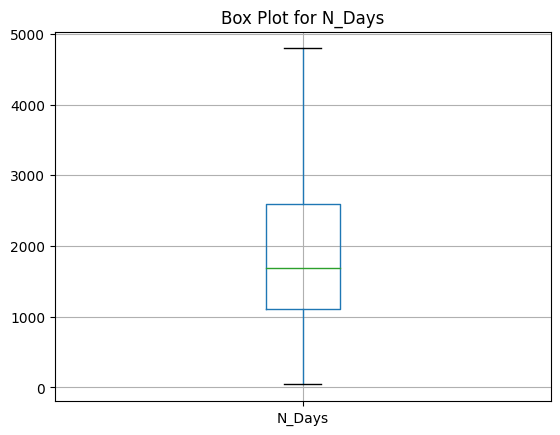

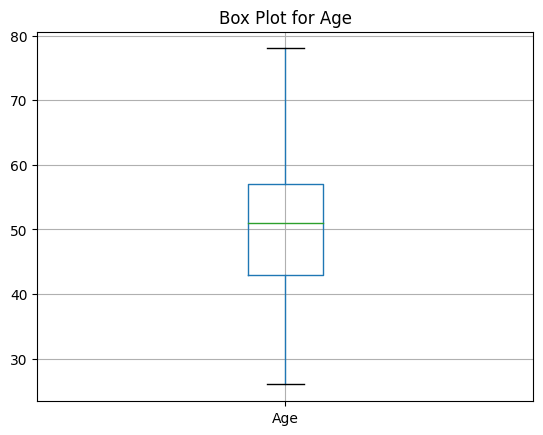

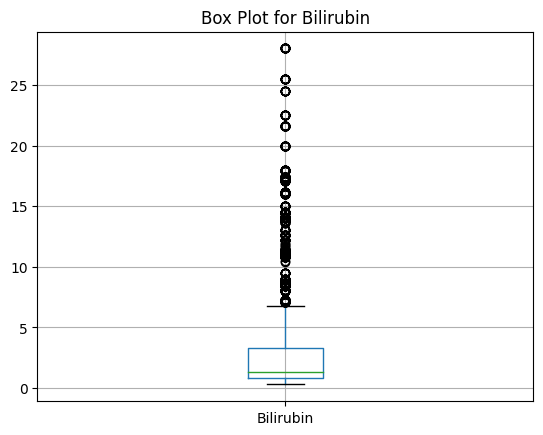

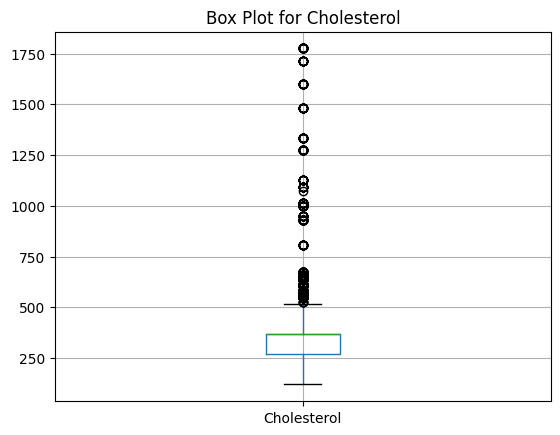

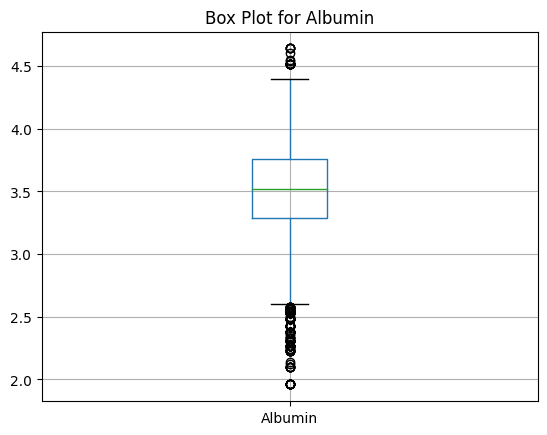

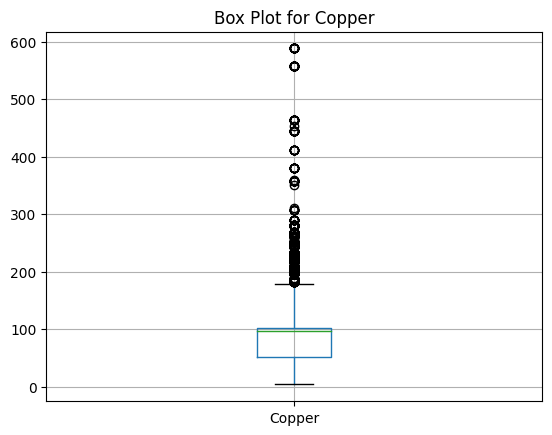

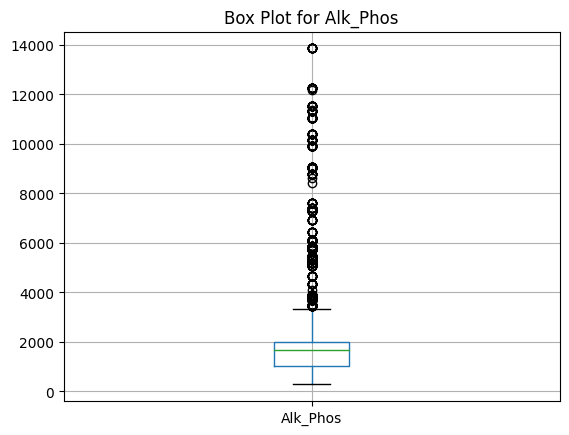

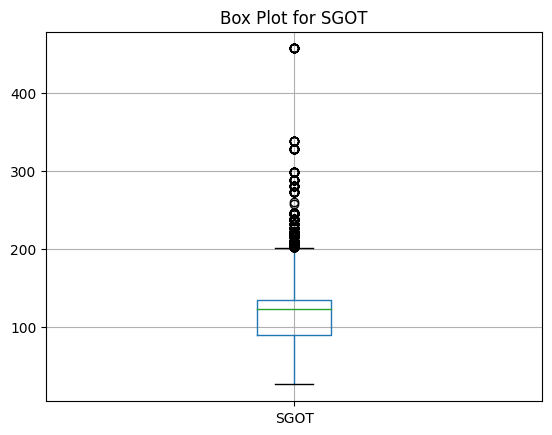

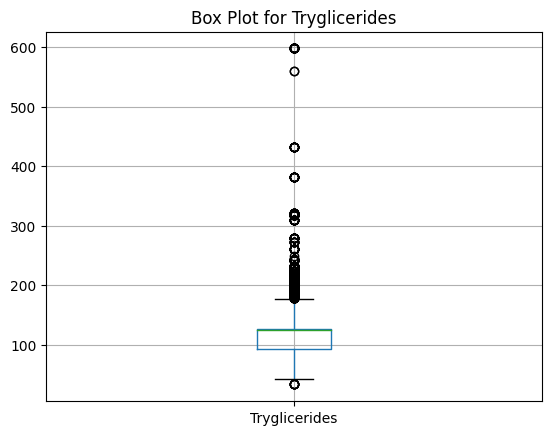

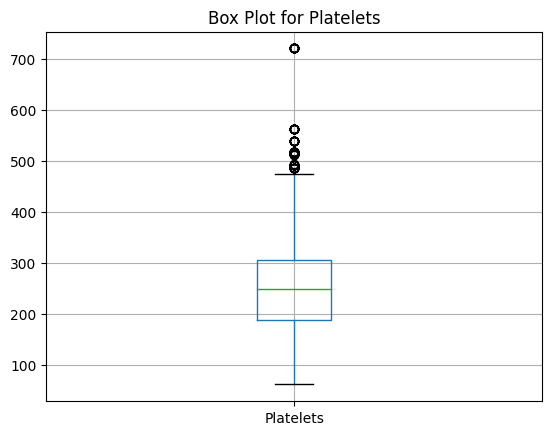

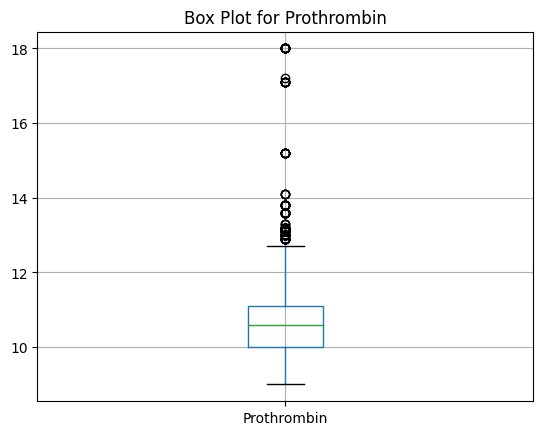

In [69]:
for column in numerical_columns:
    plt.figure()
    train.boxplot(column=column)
    plt.title(f'Box Plot for {column}')
    plt.show()

EDA

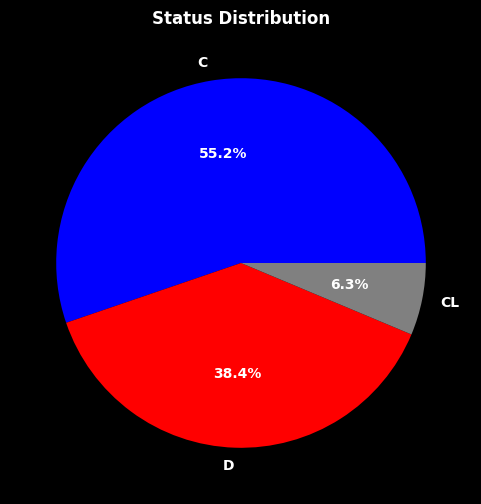

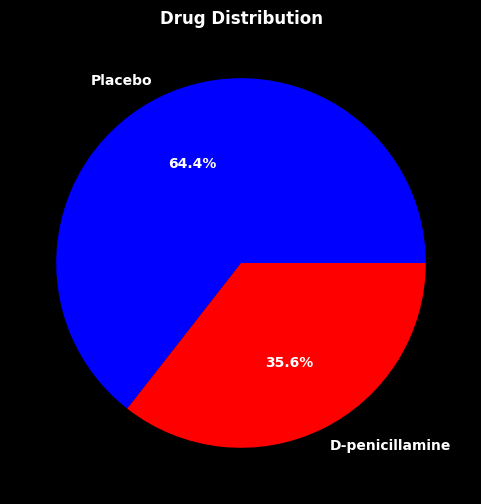

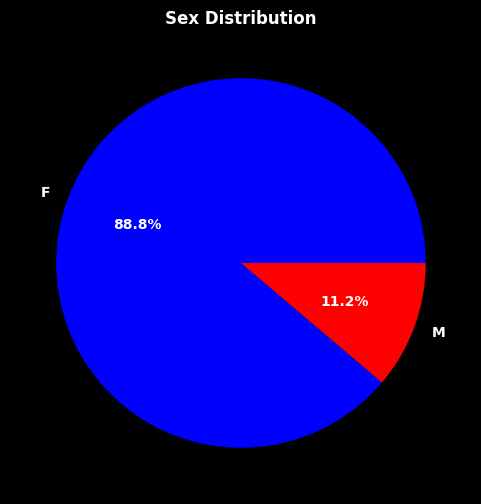

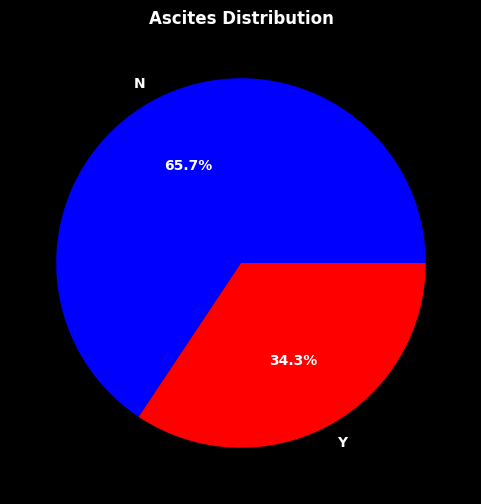

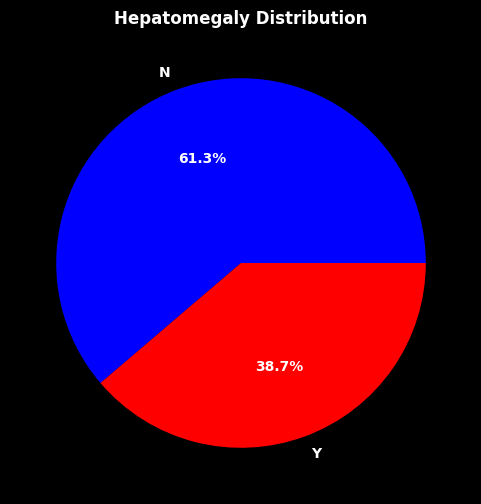

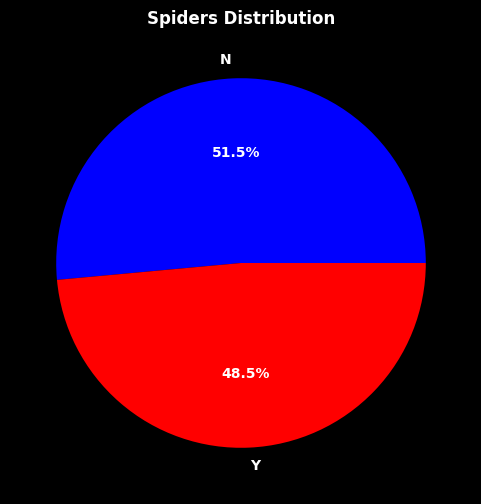

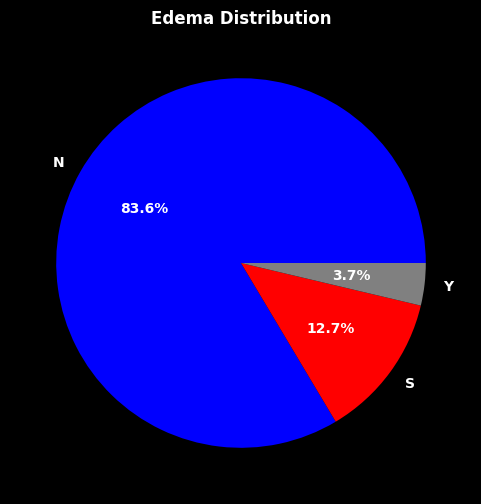

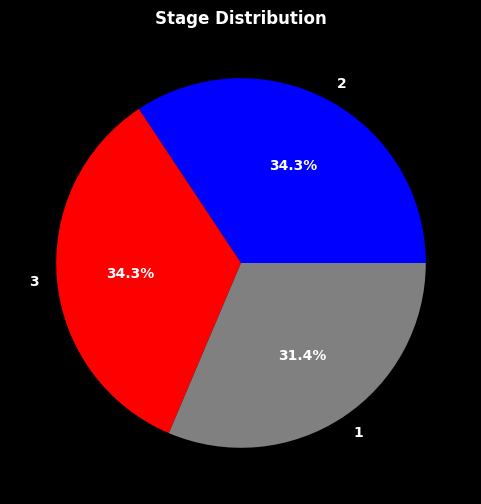

In [70]:
colors = ['blue', 'red', 'grey']

for column in categorical_columns:
    counts = data_new[column].value_counts()
    plt.figure(figsize=(6, 6))
    wedges, texts, autotexts = plt.pie(counts, labels=counts.index, colors=colors[:len(counts)], autopct='%1.1f%%', textprops=dict(color='white', weight='bold'))
    plt.setp(autotexts, size=10, weight='bold')
    plt.title(f'{column.capitalize()} Distribution', color='white', weight='bold')
    plt.gca().set_facecolor('black')
    plt.gcf().patch.set_facecolor('black')
    plt.gca().tick_params(labelcolor='white')
    plt.show()

In [71]:
numeric_data=data_new.select_dtypes(include=['number'])
data_new['Stage'] = pd.to_numeric(data_new['Stage'], errors='coerce')
correlation_matrix=data_new[numerical_columns+['Stage']].corr()['Stage'].drop('Stage')
print(correlation_matrix)

N_Days          -0.272084
Age              0.100812
Bilirubin        0.172184
Cholesterol      0.011825
Albumin         -0.237194
Copper           0.160073
Alk_Phos         0.053266
SGOT             0.096823
Tryglicerides    0.088718
Platelets       -0.204057
Prothrombin      0.262524
Name: Stage, dtype: float64


<ipython-input-71-94faf45d051d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['Stage'] = pd.to_numeric(data_new['Stage'], errors='coerce')


<ipython-input-72-fe51672e4dd2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=train, palette='viridis',legend='True')


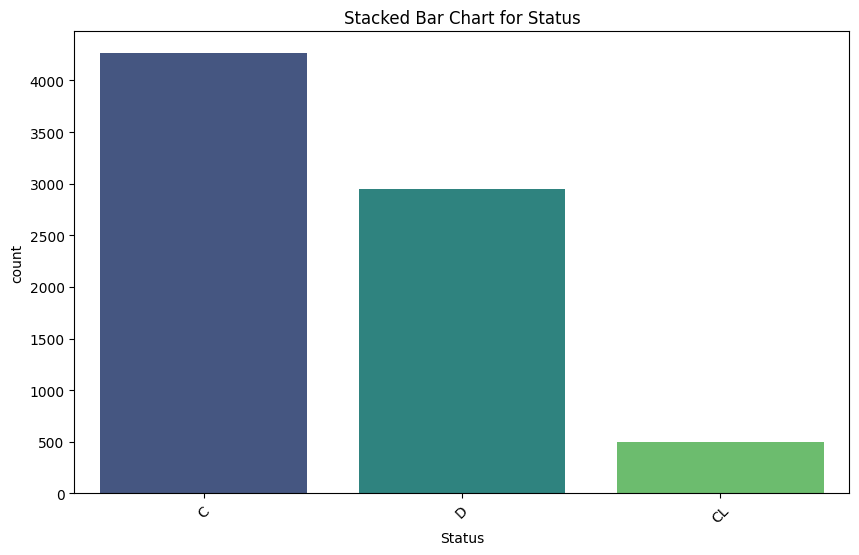

<ipython-input-72-fe51672e4dd2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=train, palette='viridis',legend='True')


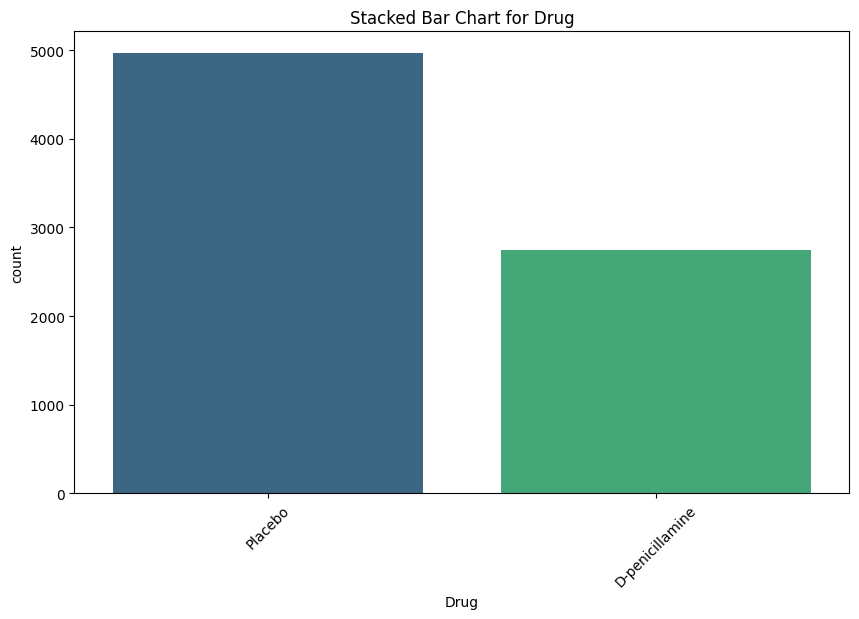

<ipython-input-72-fe51672e4dd2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=train, palette='viridis',legend='True')


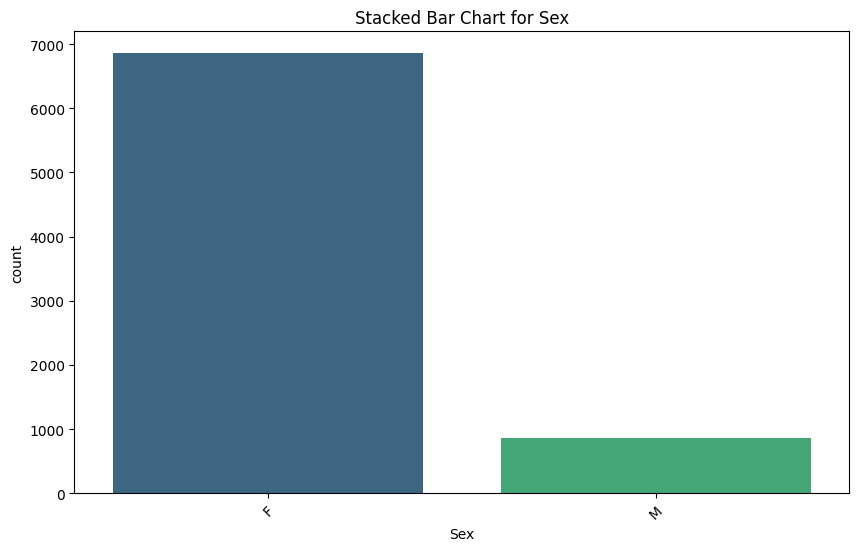

<ipython-input-72-fe51672e4dd2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=train, palette='viridis',legend='True')


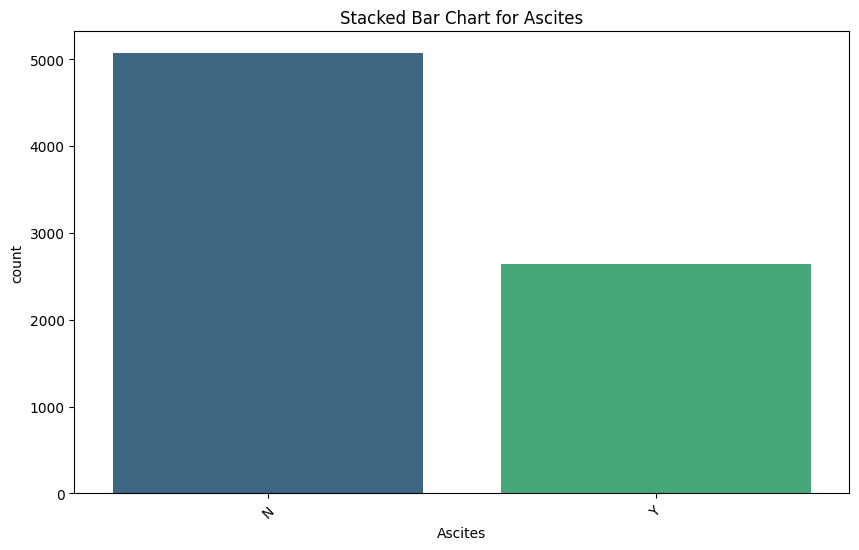

<ipython-input-72-fe51672e4dd2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=train, palette='viridis',legend='True')


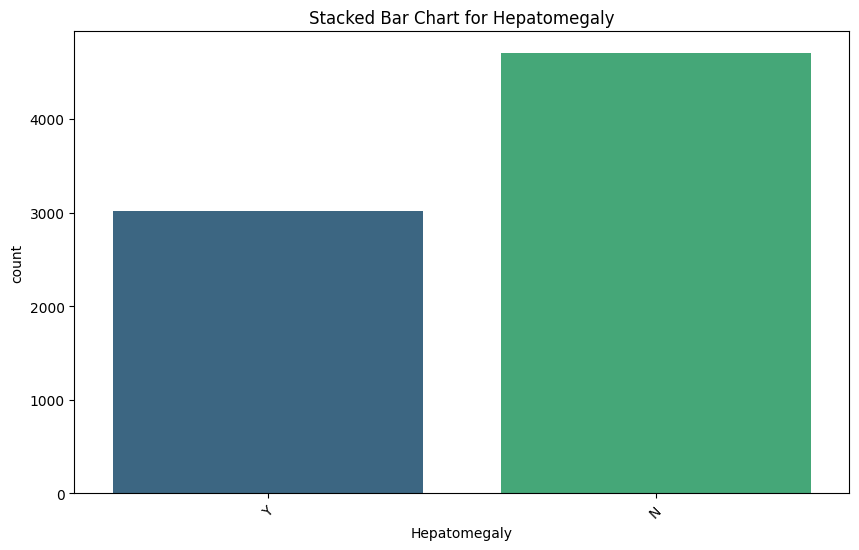

<ipython-input-72-fe51672e4dd2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=train, palette='viridis',legend='True')


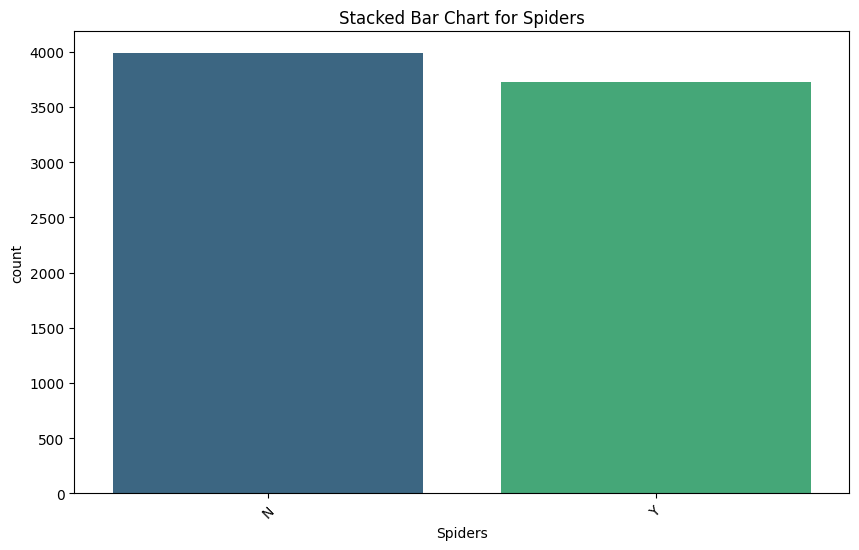

<ipython-input-72-fe51672e4dd2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=train, palette='viridis',legend='True')


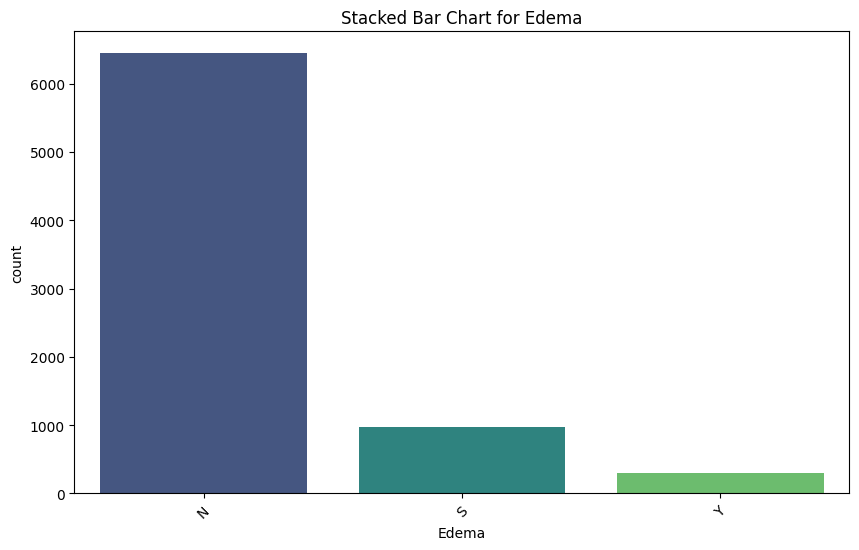

<ipython-input-72-fe51672e4dd2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=train, palette='viridis',legend='True')


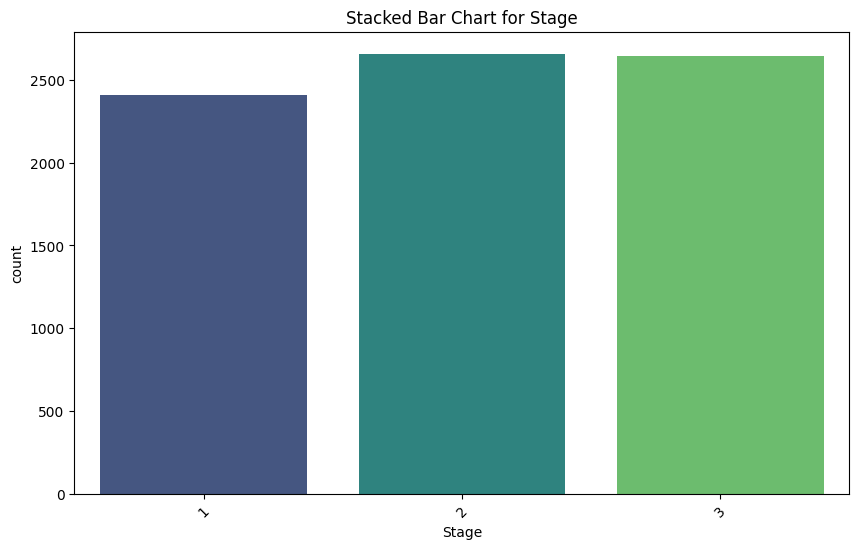

In [72]:
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=train, palette='viridis',legend='True')
    plt.title(f'Stacked Bar Chart for {column}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.show()

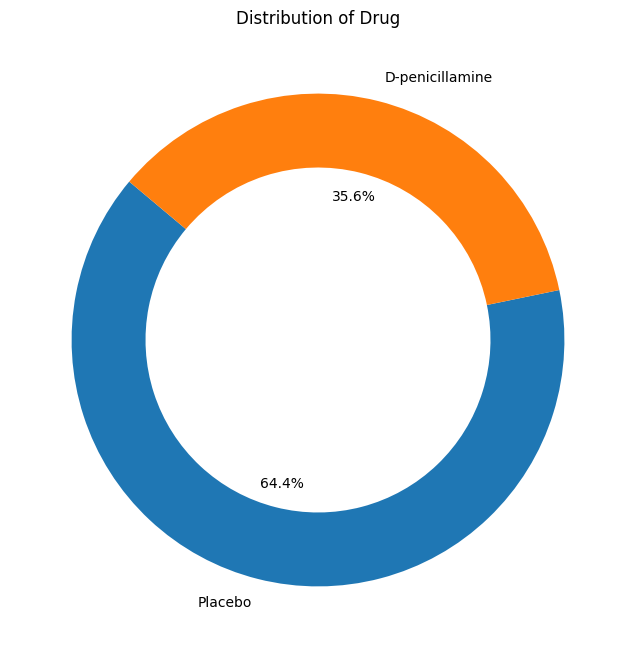

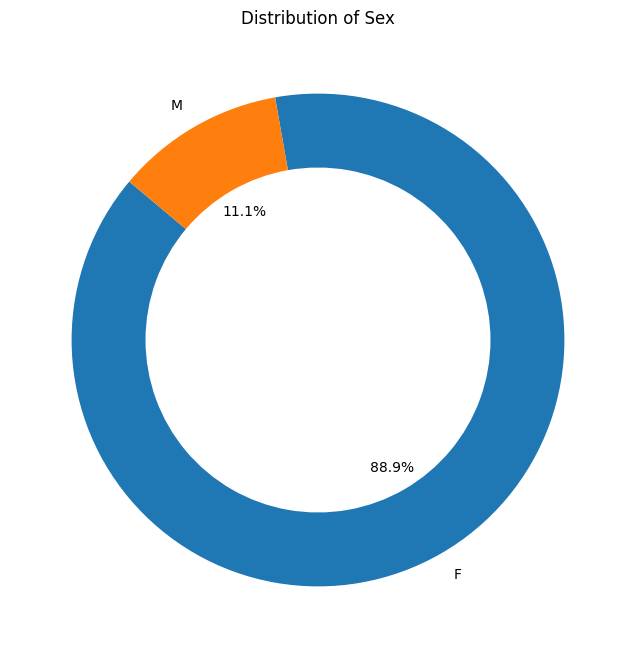

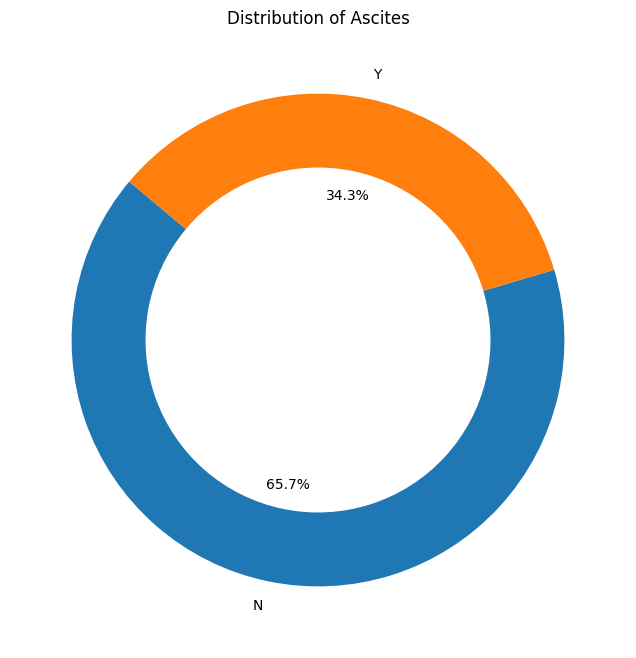

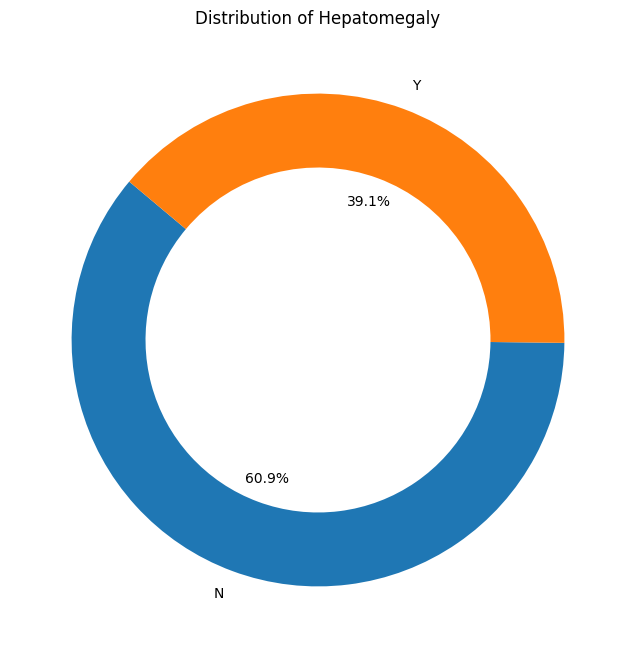

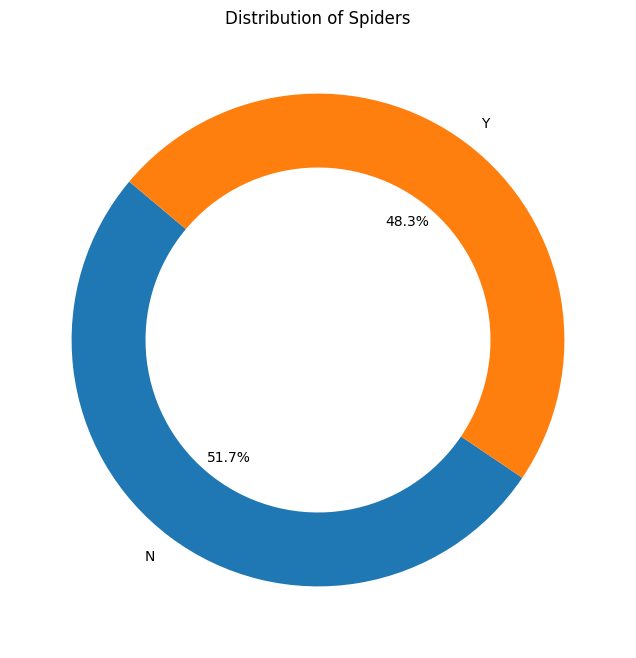

In [73]:
columns = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders']

for column in columns:
    category_counts = train[column].value_counts()

    plt.figure(figsize=(8, 8))
    plt.pie(category_counts, labels=category_counts.index, startangle=140, wedgeprops=dict(width=0.3), autopct='%1.1f%%')
    plt.title(f'Distribution of {column}')
    plt.show()


In [74]:
train.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Age_group,Stage
9377,1979,C,Placebo,47.0,F,N,Y,N,N,3.3,302.000000,3.41,51.000000,310.000000,83.700000,44.000000,225.0,11.5,Senior,3
5544,2011,D,Placebo,40.0,F,Y,N,Y,N,1.1,369.510563,3.69,97.648387,1982.655769,122.556346,124.702128,139.0,10.5,Adult,1
17783,2598,D,D-penicillamine,54.0,F,N,Y,Y,N,1.1,257.000000,3.36,43.000000,1080.000000,106.950000,73.000000,136.0,10.6,Senior,3
7300,2580,C,Placebo,49.0,F,Y,N,Y,N,0.6,369.510563,4.08,51.000000,665.000000,74.400000,124.702128,313.0,10.2,Senior,3
8443,1810,C,D-penicillamine,65.0,F,N,Y,N,N,1.9,354.000000,2.97,86.000000,1550.000000,196.850000,152.000000,277.0,9.9,Senior,2


<ipython-input-75-bb09a7580479>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train, x=column, hue='Stage', shade=True)


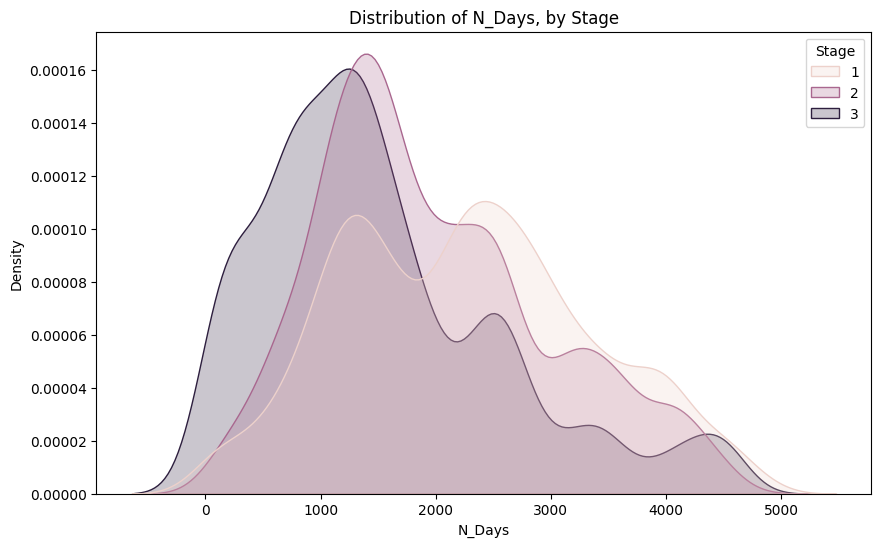

<ipython-input-75-bb09a7580479>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train, x=column, hue='Stage', shade=True)


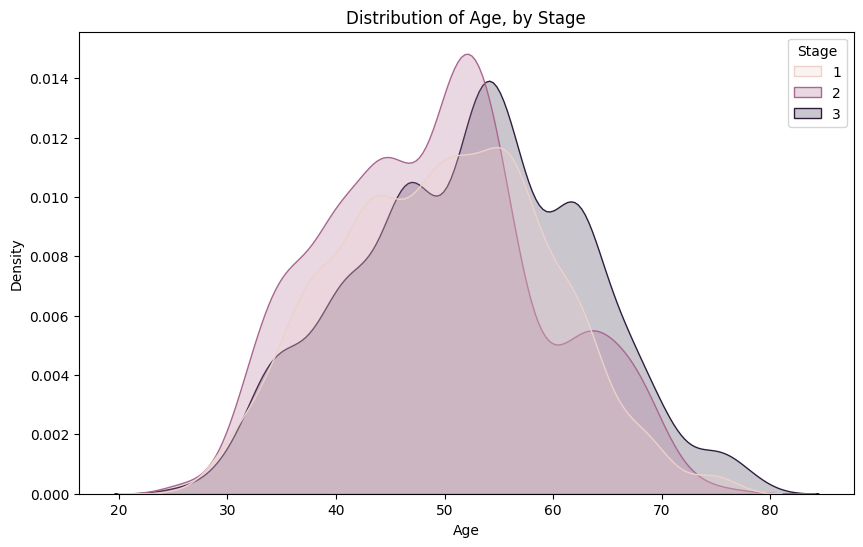

<ipython-input-75-bb09a7580479>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train, x=column, hue='Stage', shade=True)


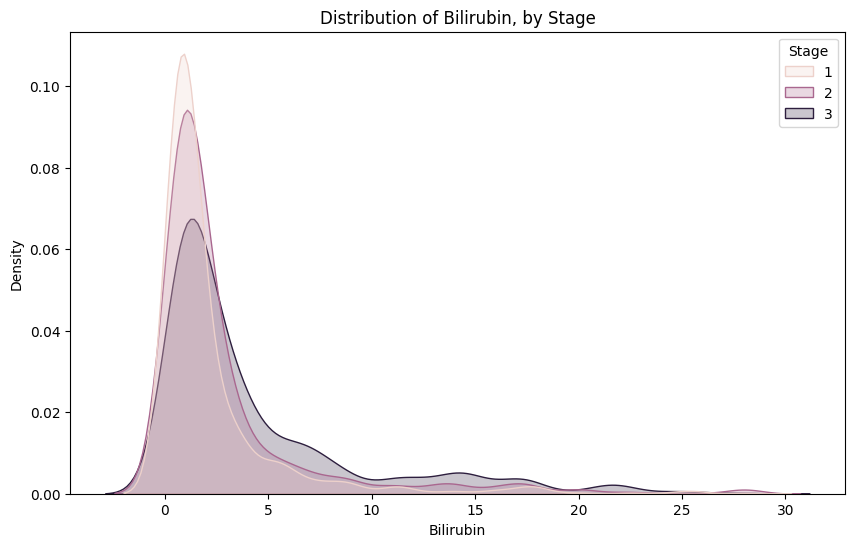

<ipython-input-75-bb09a7580479>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train, x=column, hue='Stage', shade=True)


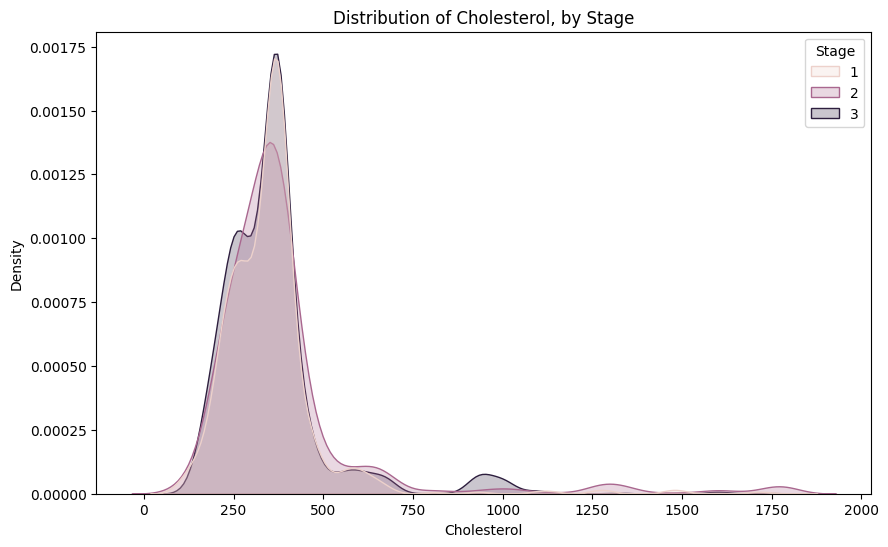

<ipython-input-75-bb09a7580479>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train, x=column, hue='Stage', shade=True)


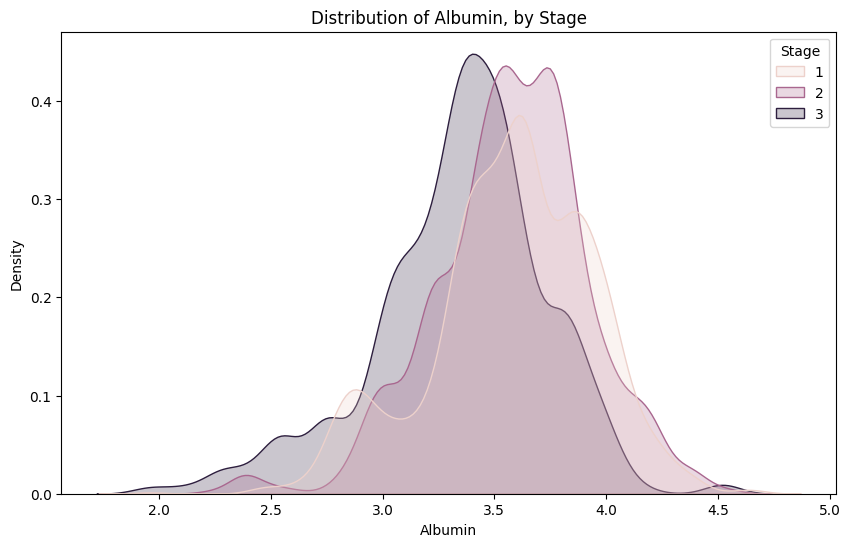

<ipython-input-75-bb09a7580479>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train, x=column, hue='Stage', shade=True)


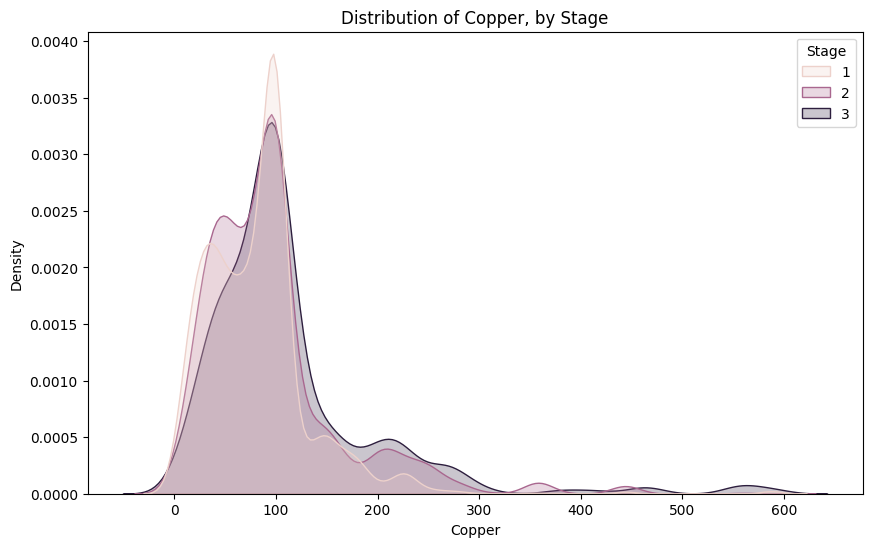

<ipython-input-75-bb09a7580479>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train, x=column, hue='Stage', shade=True)


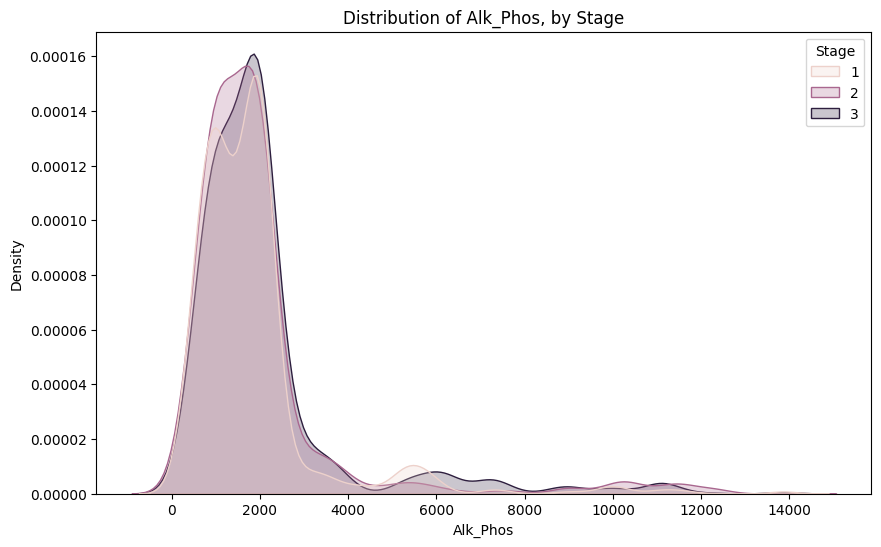

<ipython-input-75-bb09a7580479>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train, x=column, hue='Stage', shade=True)


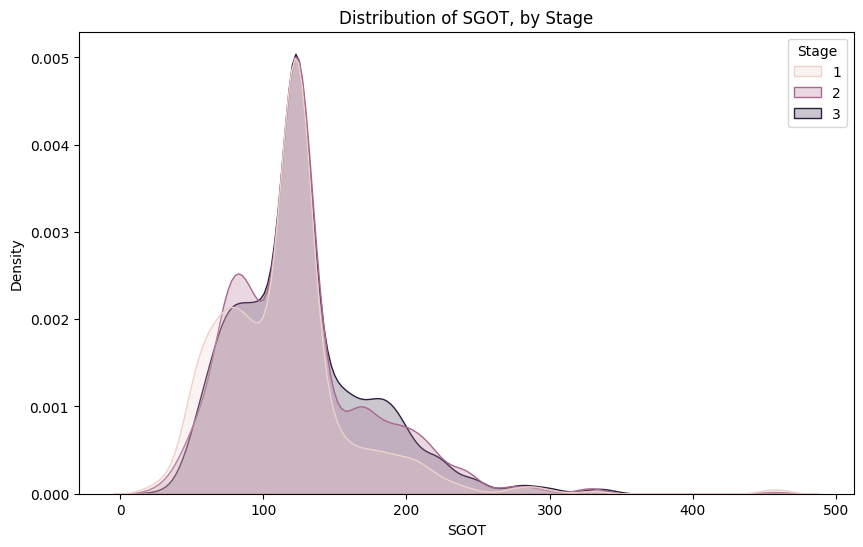

<ipython-input-75-bb09a7580479>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train, x=column, hue='Stage', shade=True)


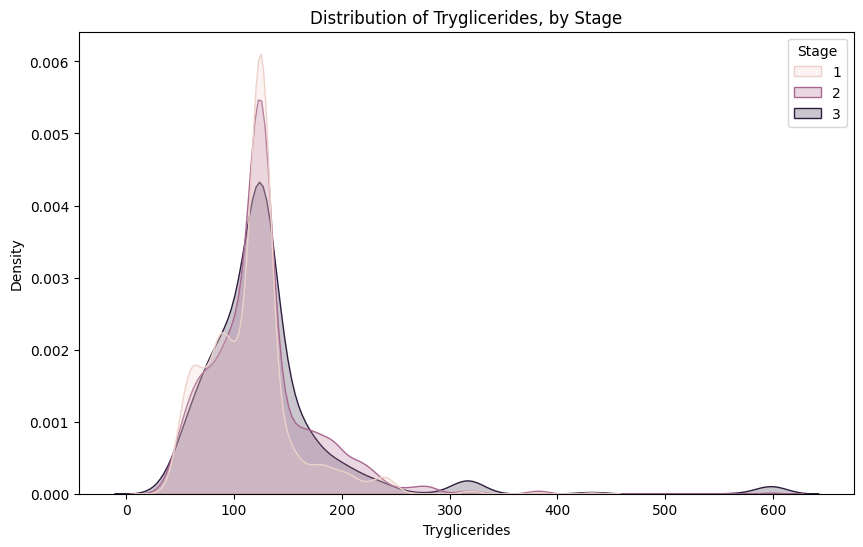

<ipython-input-75-bb09a7580479>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train, x=column, hue='Stage', shade=True)


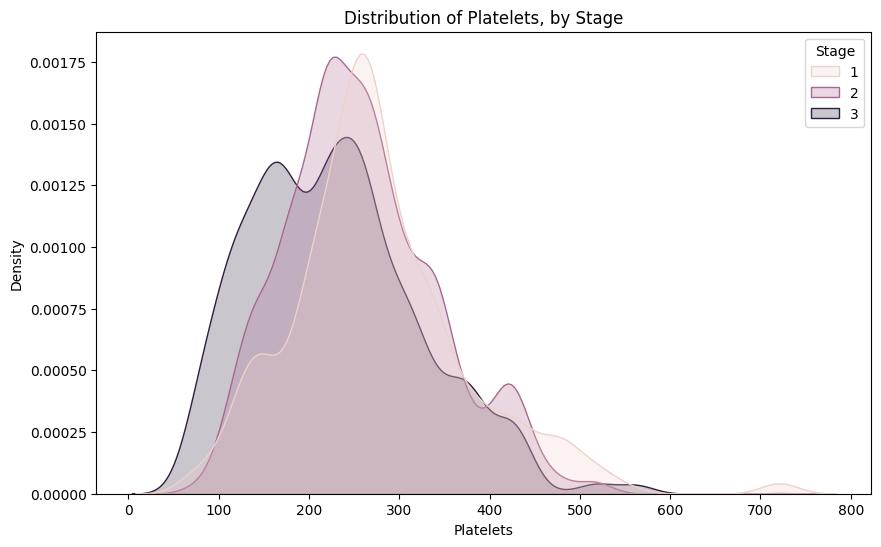

<ipython-input-75-bb09a7580479>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train, x=column, hue='Stage', shade=True)


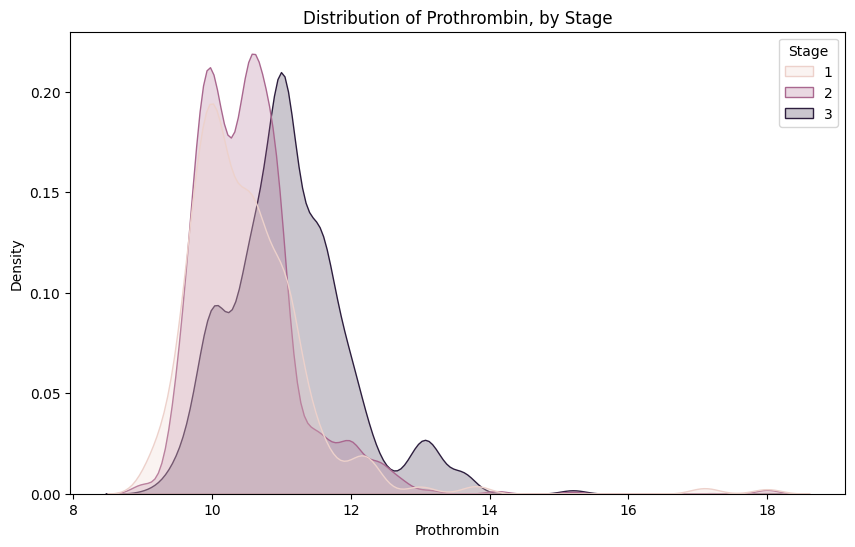

In [75]:
# KDE plots
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=train, x=column, hue='Stage', shade=True)
    plt.title(f'Distribution of {column}, by Stage')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

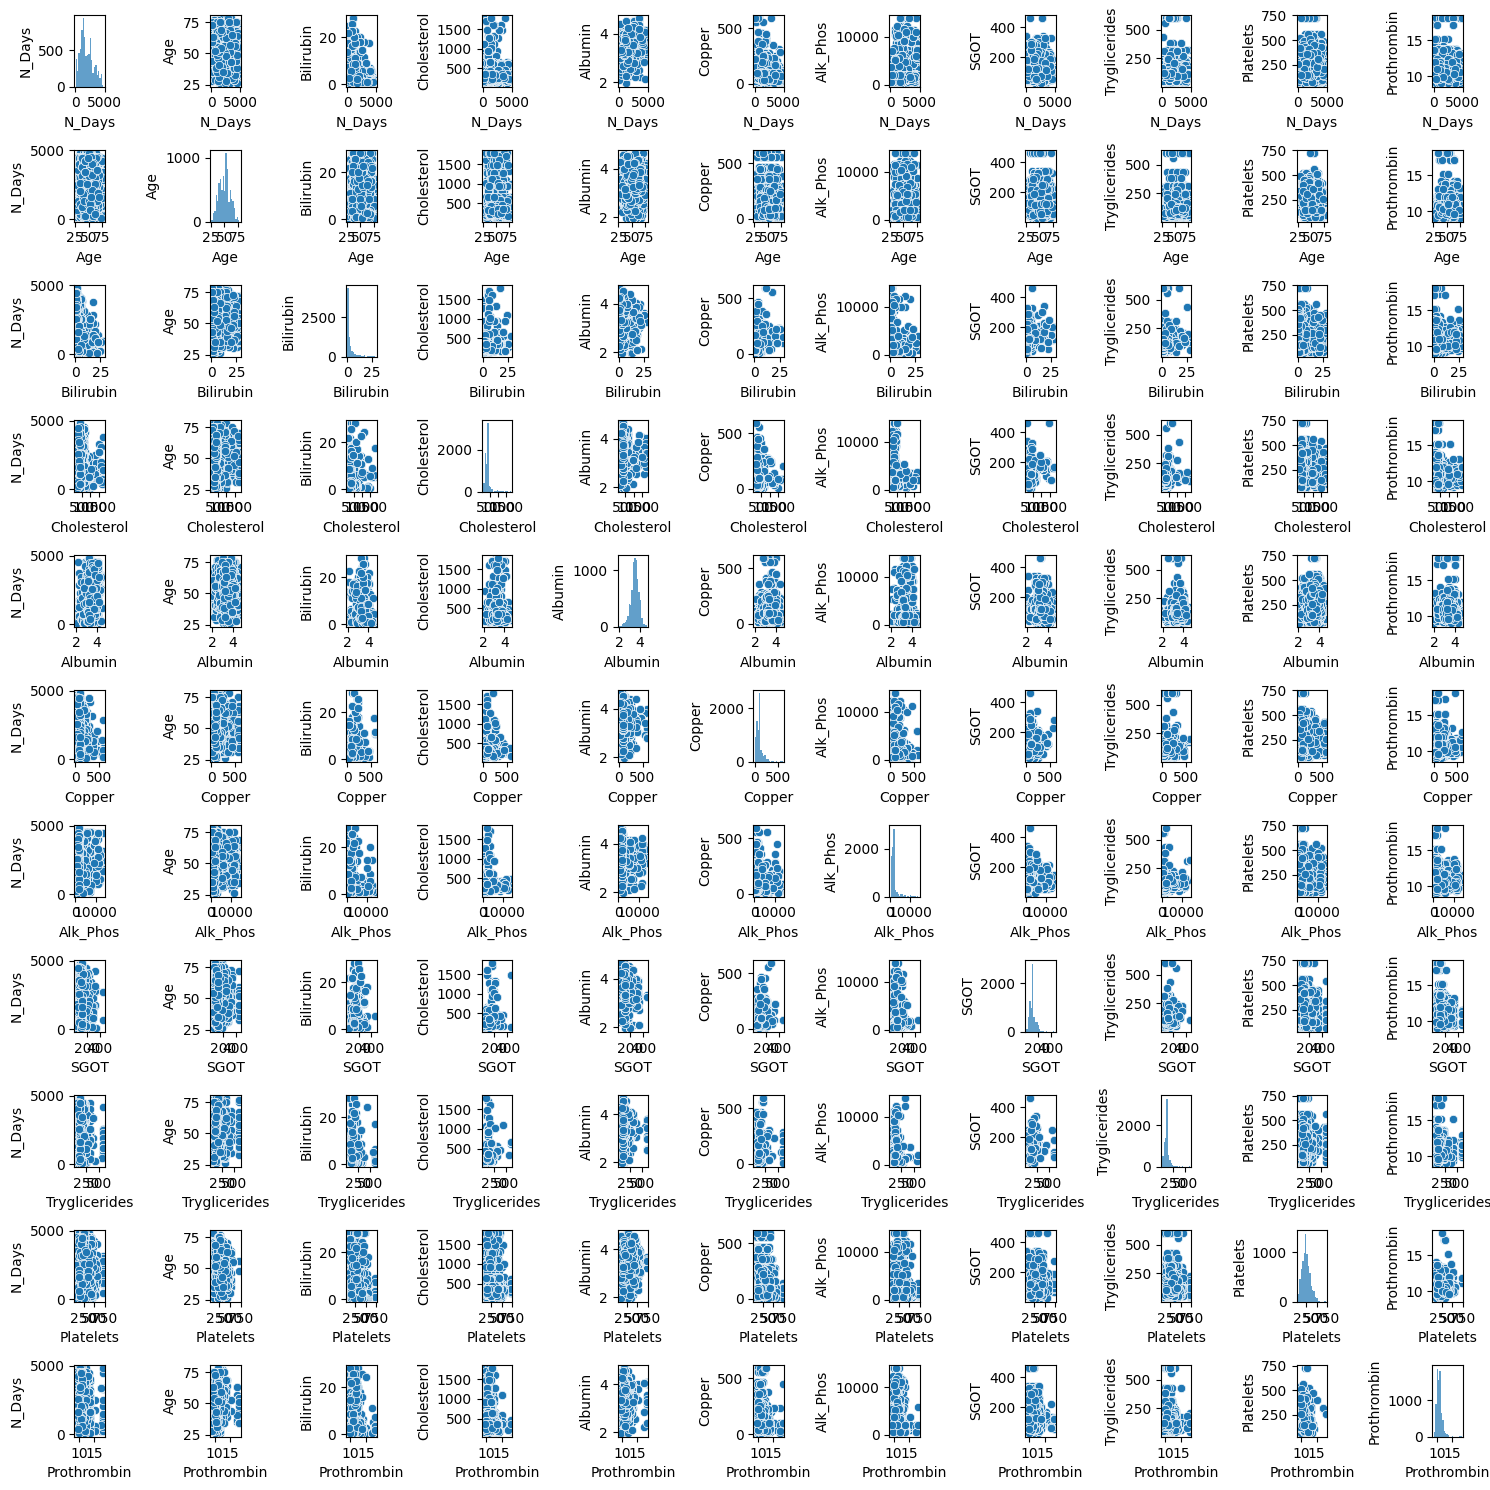

In [76]:
train_numerical_columns = [col for col in numerical_columns if col in train.columns]

# Create scatter plots
num_vars = len(train_numerical_columns)
fig, axes = plt.subplots(nrows=num_vars, ncols=num_vars, figsize=(15, 15))

for i, col_x in enumerate(train_numerical_columns):
    for j, col_y in enumerate(train_numerical_columns):
        if i == j:
            # Plot histogram on the diagonal
            axes[i, j].hist(train[col_x], bins=20, alpha=0.7)
            axes[i, j].set_xlabel(col_x)
            axes[i, j].set_ylabel(col_y)
        else:
            # Plot scatter plot for off-diagonal
            sns.scatterplot(x=train[col_x], y=train[col_y], ax=axes[i, j])
            axes[i, j].set_xlabel(col_x)
            axes[i, j].set_ylabel(col_y)

plt.tight_layout()
plt.show()


In [77]:
from scipy.stats import chi2_contingency


# Dictionary to store Chi-Square results
chi2_results = {}

# Perform Chi-Square tests for each pair of categorical variables
for i, col_x in enumerate(categorical_columns):
    for j in range(i + 1, len(categorical_columns)):
        col_y = categorical_columns[j]
        contingency_table = pd.crosstab(train[col_x], train[col_y])
        chi2_stat, p_value, dof, _ = chi2_contingency(contingency_table)
        chi2_results[(col_x, col_y)] = {
            'Chi2 Stat': chi2_stat,
            'p-value': p_value,
            'Degrees of Freedom': dof
        }

# Convert results to DataFrame for better readability
chi2_results_df = pd.DataFrame(chi2_results).T
print(chi2_results_df)



                             Chi2 Stat        p-value  Degrees of Freedom
Status       Drug             1.925968   3.817521e-01                 2.0
             Sex             16.603000   2.481443e-04                 2.0
             Ascites          6.669381   3.562560e-02                 2.0
             Hepatomegaly   368.919706   7.764325e-81                 2.0
             Spiders         21.618054   2.021618e-05                 2.0
             Edema          581.064284  1.941692e-124                 4.0
             Stage          529.622975  2.620631e-113                 4.0
Drug         Sex             21.629510   3.307242e-06                 1.0
             Ascites       1190.379977  7.516322e-261                 1.0
             Hepatomegaly   123.184783   1.270484e-28                 1.0
             Spiders        701.688070  1.284171e-154                 1.0
             Edema            0.679537   7.119350e-01                 2.0
             Stage           13.017359

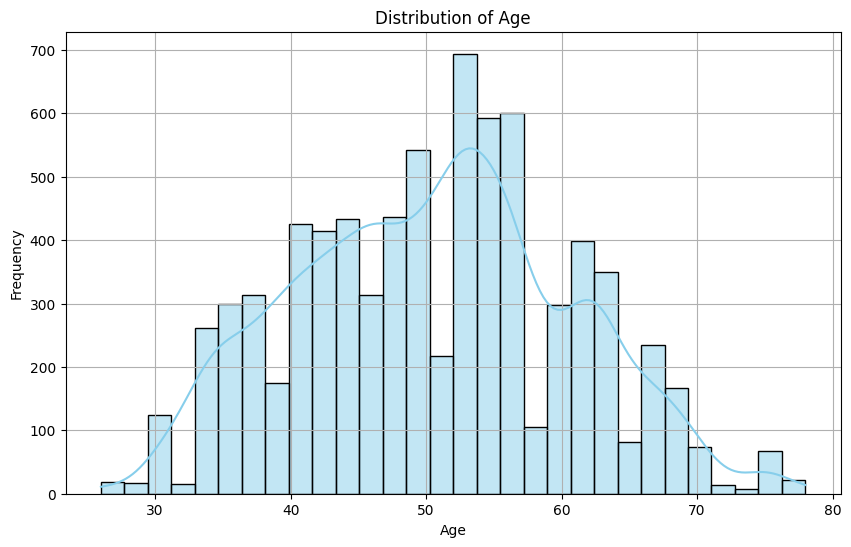

In [78]:
# Histogram of Age
plt.figure(figsize=(10, 6))
sns.histplot(train['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


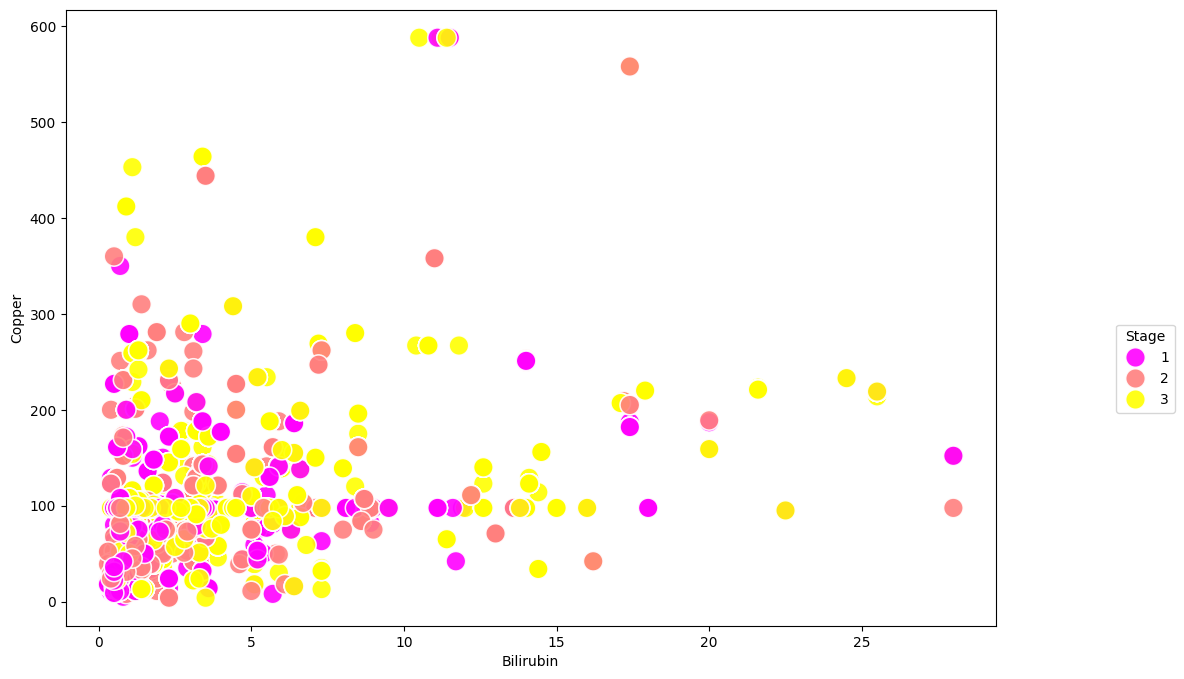

In [79]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='Bilirubin',y='Copper',data=train,hue='Stage',s=200,alpha=0.9,palette='spring')
plt.legend(bbox_to_anchor=(1.2,0.5),title="Stage")

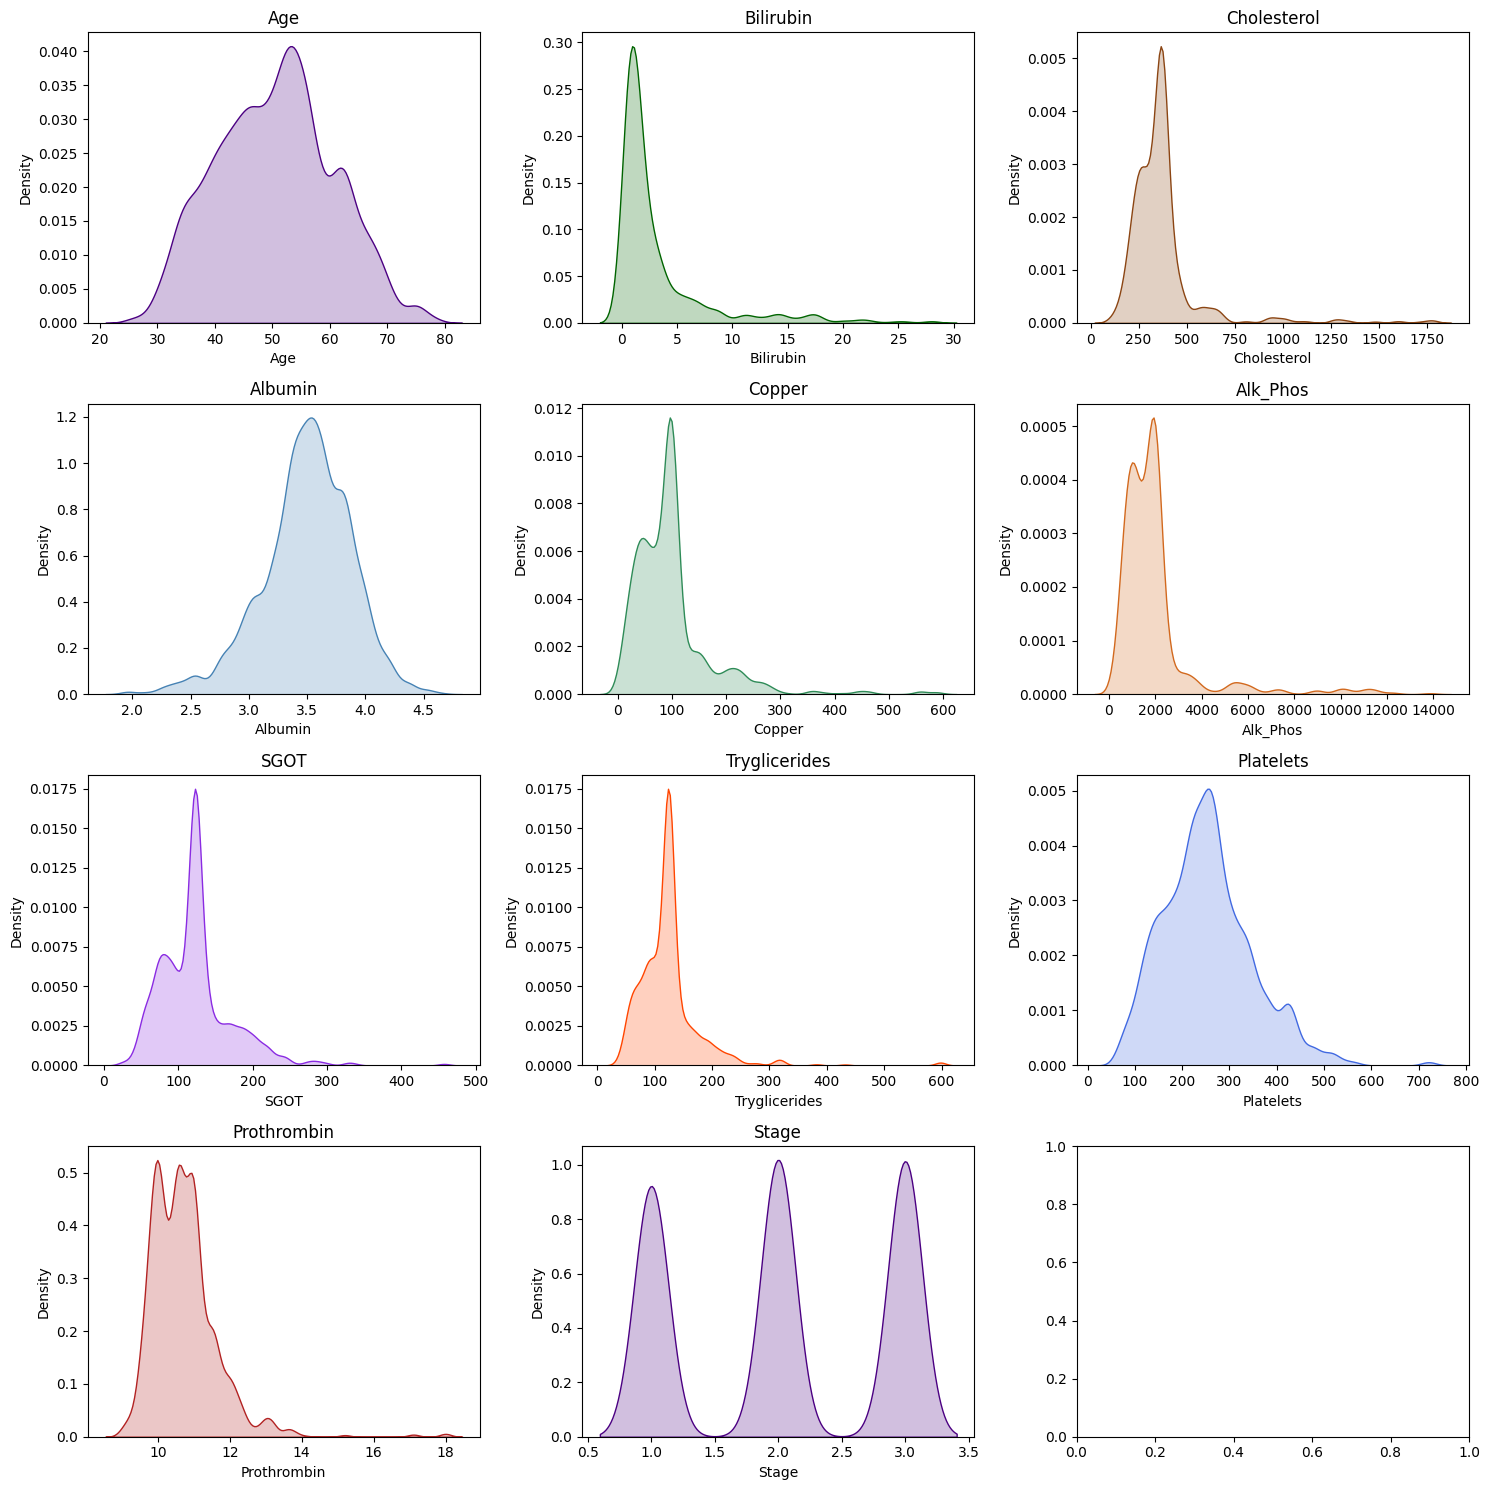

In [81]:
# Define color palette
colors = ['#4B0082', '#006400', '#8B4513', '#4682B4', '#2E8B57', '#D2691E', '#8A2BE2', '#FF4500', '#4169E1', '#B22222']

columns = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
num_rows = 4
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = axes.flatten()

for i, column in enumerate(columns):
    ax = axes[i]
    color = colors[i % len(colors)]  # Reuse colors if there are more columns than colors
    sns.kdeplot(data=train[column], ax=ax, fill=True, color=color)
    ax.set_title(column)
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()